In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
import math
import pandas as pd
import csv
from scipy import stats
from scipy import optimize
from datetime import date, timedelta
import random
import requests
#import modelos as md
import datetime as dt
import pandas as pd
import sys
from matplotlib import pyplot as plt
from datetime import datetime

# Data for Brazilian states

## Cases

In [76]:
data = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
data = data#[data["state"] != "TOTAL"]

In [77]:
data

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,0.00047,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,0.00047,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,112,2021-03-25,Brazil,SC,TOTAL,187,10108,7486,786197,10108,...,10973.06717,0.01286,736209.0,141866.0,1827719.0,25509.74293,449463.0,6273.22120,122958.0,1716.14289
10594,112,2021-03-25,Brazil,SE,TOTAL,21,3368,922,169458,3368,...,7371.91869,0.01988,155880.0,4807.0,346186.0,15060.10364,134963.0,5871.28529,39552.0,1720.62770
10595,112,2021-03-25,Brazil,SP,TOTAL,599,69503,18447,2370885,69503,...,5163.18402,0.02932,2038783.0,1084681.0,9544530.0,20785.55677,3894310.0,8480.81588,1335867.0,2909.17828
10596,112,2021-03-25,Brazil,TO,TOTAL,0,1885,0,136020,1885,...,8647.90770,0.01386,115280.0,598.0,417093.0,26518.02506,67571.0,4296.04302,32683.0,2077.92654


In [78]:
region = 'SP'
dta = data[data.state == region]
dta

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,112,2021-03-21,Brazil,SP,TOTAL,144,67558,8265,2306326,67558,...,5022.59095,0.02929,2001058.0,1074508.0,9544530.0,20785.55677,3433315.0,7476.88612,1204607.0,2623.32741
10511,112,2021-03-22,Brazil,SP,TOTAL,44,67602,4775,2311101,67602,...,5032.98969,0.02925,2013250.0,1074508.0,9544530.0,20785.55677,3572885.0,7780.83405,1223705.0,2664.91800
10539,112,2021-03-23,Brazil,SP,TOTAL,1021,68623,20942,2332043,68623,...,5078.59603,0.02943,2013250.0,1074508.0,9544530.0,20785.55677,3677754.0,8009.21204,1245122.0,2711.55877
10567,112,2021-03-24,Brazil,SP,TOTAL,281,68904,20395,2352438,68904,...,5123.01115,0.02929,2038783.0,1074508.0,9544530.0,20785.55677,3768191.0,8206.16080,1297151.0,2824.86469


In [79]:
j = dta.newCases.to_numpy()

In [80]:
j

array([    1,     0,     0,     1,     0,     0,     0,     0,     1,
           3,     4,     3,     3,     0,     3,    11,    16,    10,
           9,    71,    16,    12,    77,    45,   110,    63,   172,
         114,    65,    52,   191,   170,   183,    45,    66,   822,
         642,   525,   542,   418,   154,   246,   816,  1026,   772,
         736,   203,   336,   140,   476,  1672,   525,  1273,  1053,
         373,   313,   805,   529,   826,  1086,  2178,   711,   981,
        2345,  2117,  2540,  1676,   800,   598,   415,  1866,  3800,
        2075,  1902,  2581,  1033,   687,  1588,  3378,  3189,  4092,
        2805,  1162,   721,  2929,  3864,  3880,  3132,  3687,  1603,
        1464,  2392,  3466,  6382,  5691,  5586,  2556,  1598,  6999,
        5188,  5717,  5365,  5984,  2524,  1520,  5545,  6178,  6204,
        5380,  4975,  5327,  3258,  8825,  1232,  1111, 19030,  4135,
        3392,  2788,  7502,  9347,  9765,  9921,  7073,  6156,  3408,
        6235,  8555,

# Computation of the mathematical expression of Rt for the model SIR

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [106]:
from scipy.integrate import quad

def integrand(a,t,gamma):
    if a>t: 
        return 0
    else:
        return j[t-a]*(gamma*np.exp(-gamma*a))
    
vec_integrand = np.vectorize(integrand)

def r(t,gamma):
    r_t = j[t]/sum(vec_integrand(np.arange(0, len(j), 1), t, gamma))
    return r_t

vec_r = np.vectorize(r)

In [107]:
rt_SIR =vec_r(np.arange(0, len(j), 1),1/10)

<ipython-input-108-51b71662e5c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['date']= pd.to_datetime(dta['date'])


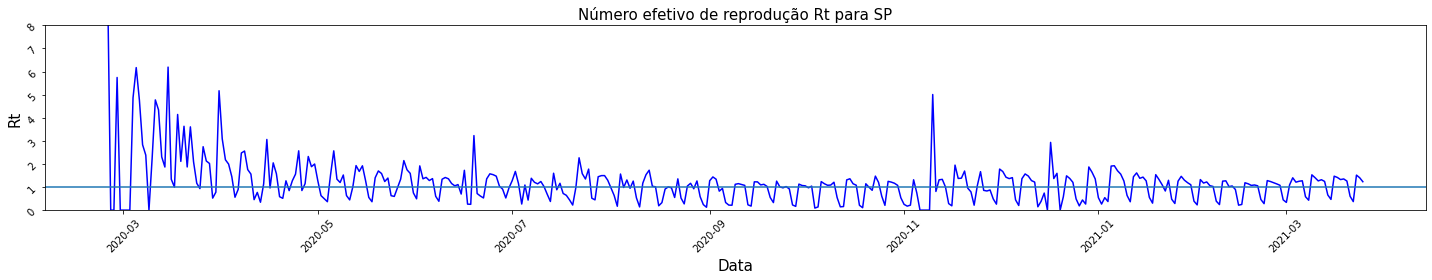

In [108]:
value = region
    
dta['date']= pd.to_datetime(dta['date']) 

x = dta.date
    
y1 = vec_r(np.arange(0, len(j), 1),1/10)
    
fig, ax = plt.subplots(figsize=(20,4))
    
ax.plot(x,y1, color='blue')
    
    
ax.axhline(y=1) 
    
ax.set_ylim((0, 8))

ax.set_title('Número efetivo de reprodução Rt para {}'.format(value), fontsize = 15)
ax.set_ylabel('Rt', fontsize = 15)
ax.set_xlabel('Data',fontsize = 15)
    
ax.tick_params(labelrotation=45)
    
plt.tight_layout()
    
#plt.savefig('Rt_salvador_SMS.png')
    #ax.grid(True)


# Computation of the mathematical expression of Rt for the model SEIR

\begin{equation}\label{eqRt}
  \mathcal{R}(t) = \frac{b(t)}{\int_0^\infty b(t-\tau)g(\tau)d\tau},
\end{equation}

where 

$$ g(\tau) = \left\{ \begin{array}{ll}
         \gamma^{2}te^{-\gamma t} & \mbox{if $\kappa = \gamma$};\\
        \frac{\kappa \gamma}{\kappa -\gamma}(e^{-\gamma \tau} -e^{-\kappa \tau}) & \mbox{if $\kappa \neq \gamma$}.\end{array} \right. $$
        
Ref: Equivalence of the Erlang-Distributed SEIR Epidemic Model and the Renewal Equation
https://epubs.siam.org/doi/abs/10.1137/18M1186411?af=R


In [109]:
from scipy.integrate import quad

# Define the generation function

def generation(kappa,gamma,a):
    if kappa!= gamma: 
        return (kappa*gamma/(kappa - gamma))*(np.exp(-gamma*a) - np.exp(-kappa*a))
    else:
        return (gamma**2)*a*np.exp(-gamma*a)

def integrand(kappa,gamma,a,t):
    if a>t: 
        return 0
    else:
        return j[t-a]*(generation(kappa,gamma,a))
    
vec_integrand = np.vectorize(integrand)

In [110]:
def r(kappa,gamma,t):
    r_t = j[t]/sum(vec_integrand(kappa,gamma,np.arange(0, len(j), 1),t))
    return r_t

vec_r = np.vectorize(r)

In [111]:
rt_SEIR = vec_r(1/4,1/10,np.arange(0, len(j), 1))

<ipython-input-110-11642e4df131>:2: RuntimeWarning: divide by zero encountered in true_divide
  r_t = j[t]/sum(vec_integrand(kappa,gamma,np.arange(0, len(j), 1),t))


<ipython-input-110-11642e4df131>:2: RuntimeWarning: divide by zero encountered in true_divide
  r_t = j[t]/sum(vec_integrand(kappa,gamma,np.arange(0, len(j), 1),t))
<ipython-input-112-533d40fd5bcf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['date']= pd.to_datetime(dta['date'])


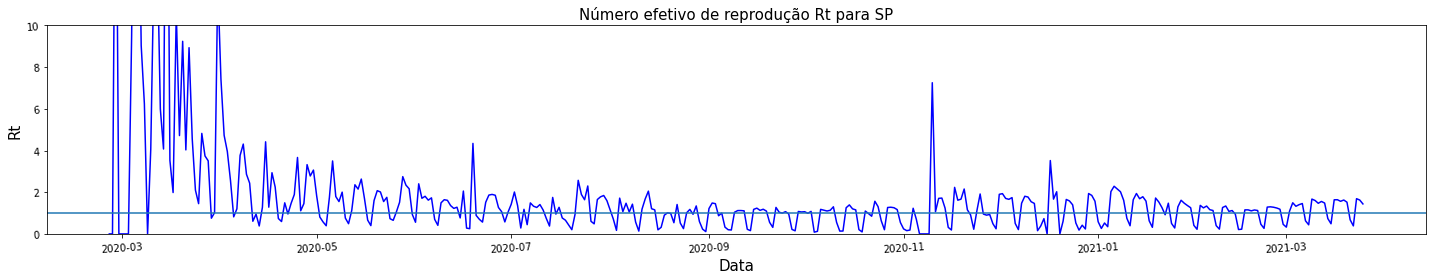

In [112]:
value = region

dta['date']= pd.to_datetime(dta['date']) 

x = dta.date
    
y1 = vec_r(1/4,1/10,np.arange(0, len(j), 1))


fig, ax = plt.subplots(figsize=(20,4))
    
ax.plot(x,y1, color='blue')
    
ax.axhline(y=1) 
    
ax.set_ylim((0, 10))

ax.set_title('Número efetivo de reprodução Rt para {}'.format(value), fontsize = 15)
ax.set_ylabel('Rt', fontsize = 15)
ax.set_xlabel('Data',fontsize = 15)
    
ax.tick_params(labelrotation=4)
    
plt.tight_layout()
    
#plt.savefig('Rt_salvador_SMS.png')
    #ax.grid(True)



# Computation of the mathematical expression of Rt for the model SEIIR

$$
  \mathcal{R}(t) = \frac{b(t)}{\int_0^\infty b(t-\tau)g(\tau)d\tau},
$$

\begin{equation}
    g(\tau)= \frac{p  \; g_s(\tau)/\gamma_s + \delta(1-p)\; g_a(\tau)/\gamma_a }{p/ \gamma_s +\delta(1-p)/\gamma_a} \\
    = \frac{p  \; g_s(\tau)\gamma_a + \delta(1-p)\; g_a(\tau)\gamma_s }{p\gamma_a +\delta(1-p)\gamma_s} 
\end{equation}

where 

$$ g_*(\tau) = \left\{ \begin{array}{ll}
         \gamma_{*}^{2}te^{\gamma_{*}t} & \mbox{if $\kappa = \gamma_*$};\\
        \frac{\kappa \gamma_*}{\kappa -\gamma_*}(e^{-\gamma_* \tau} -e^{-\kappa \tau}) & \mbox{if $\kappa \neq \gamma_*$}.\end{array} \right. $$

for $* \in \{a, s\}$

In [113]:
from scipy.integrate import quad

# Define the generation function

def generation(kappa,gamma,a):
    if kappa!= gamma: 
        return (kappa*gamma/(kappa - gamma))*(np.exp(-gamma*a) - np.exp(-kappa*a))
    else:
        return (gamma**2)*a*np.exp(-gamma*a)
    
def gene_full(kappa,gammaA,gammaS,p,delta,a):
    return (p*generation(kappa,gammaS,a)*gammaA + delta*(1-p)*generation(kappa,gammaA,a)*gammaS)/(p*gammaA + delta*(1-p)*gammaS)
    

In [114]:
def integrand(kappa,gammaA,gammaS,p,delta,a,t):
    if a>t: 
        return 0
    else:
        return j[t-a]*(gene_full(kappa,gammaA,gammaS,p,delta,a))
    
vec_integrand = np.vectorize(integrand)

In [115]:
def r(kappa,gammaA,gammaS,p,delta,t):
    r_t = j[t]/sum(vec_integrand(kappa,gammaA,gammaS,p,delta,np.arange(0, len(j), 1),t))
    return r_t

vec_r = np.vectorize(r)

In [116]:
rt_SEIIR = vec_r(1/4,1/7,1/14,0.2,0.3,np.arange(0, len(j), 1))

<ipython-input-115-6ae1023e82b5>:2: RuntimeWarning: divide by zero encountered in true_divide
  r_t = j[t]/sum(vec_integrand(kappa,gammaA,gammaS,p,delta,np.arange(0, len(j), 1),t))


<ipython-input-120-91307e88a042>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['date']= pd.to_datetime(dta['date'])
<ipython-input-115-6ae1023e82b5>:2: RuntimeWarning: divide by zero encountered in true_divide
  r_t = j[t]/sum(vec_integrand(kappa,gammaA,gammaS,p,delta,np.arange(0, len(j), 1),t))


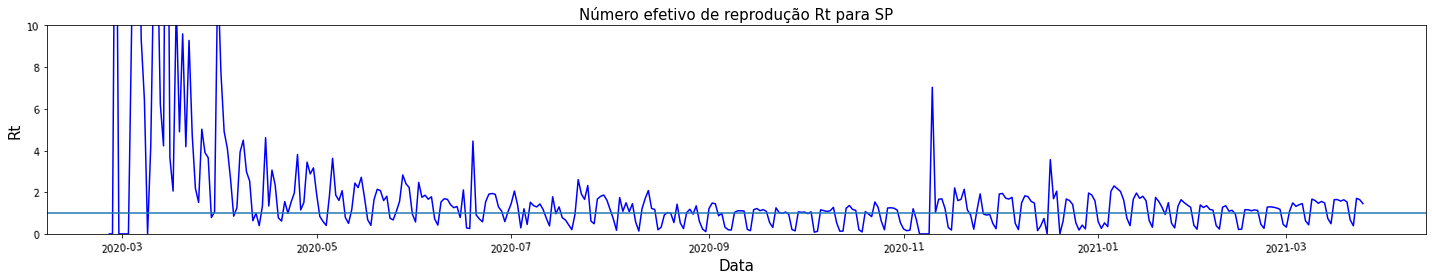

In [120]:
value = region

dta['date']= pd.to_datetime(dta['date']) 

x = dta.date
    
y1 = vec_r(1/4,1/7,1/14,0.2,0.3,np.arange(0, len(j), 1))

    
fig, ax = plt.subplots(figsize=(20,4))
    
ax.plot(x,y1, color='blue')    
    
ax.axhline(y=1) 
    
ax.set_ylim((0, 10))

ax.set_title('Número efetivo de reprodução Rt para {}'.format(value), fontsize = 15)
ax.set_ylabel('Rt', fontsize = 15)
ax.set_xlabel('Data',fontsize = 15)
    
ax.tick_params(labelrotation=4)
    
plt.tight_layout()
    
#plt.savefig('Rt_salvador_SMS.png')
    #ax.grid(True)




# Compare Rt

<ipython-input-119-2e96472f064e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['date']= pd.to_datetime(dta['date'])


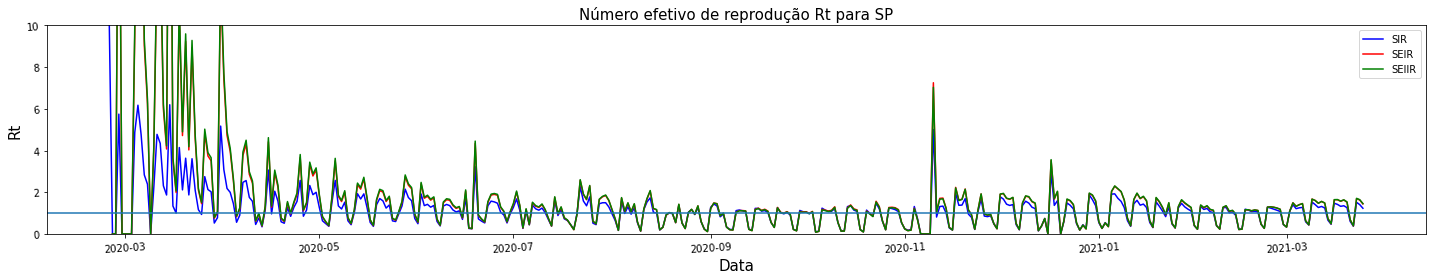

In [119]:
value = region

dta['date']= pd.to_datetime(dta['date']) 

x = dta.date
    
y1 = rt_SIR 

y2 = rt_SEIR       
    
y3 = rt_SEIIR
    
fig, ax = plt.subplots(figsize=(20,4))
    
ax.plot(x,y1, color='blue', label = 'SIR')
ax.plot(x,y2,color='red', label = 'SEIR')
ax.plot(x,y3, color='green', label = 'SEIIR')
#    ax.fill_between(x, y2, y3, lw=2, alpha=0.4)
leg = ax.legend()   
    
ax.axhline(y=1) 
    
ax.set_ylim((0, 10))

ax.set_title('Número efetivo de reprodução Rt para {}'.format(value), fontsize = 15)
ax.set_ylabel('Rt', fontsize = 15)
ax.set_xlabel('Data',fontsize = 15)
    
ax.tick_params(labelrotation=4)
    
plt.tight_layout()
    
#plt.savefig('Rt_salvador_SMS.png')
    #ax.grid(True)


